### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - "Typical" Generalization in Multilayer Neural Networks](#-Question-2---"Typical"-Generalization-in-Multilayer-Neural-Networks)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Equivariance](#-Question-5---Equivariance)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
* $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

* $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

* $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - "Typical" Generalization in Multilayer Neural Networks
---


We examine a "student" neural network  $f_{\mathbf{w}}\left(\mathbf{x}\right)$ with parameter vector $\mathbf{w}\in\mathbb{R}^{k}$ and input $\mathbf{x}\in\mathbb{R}^{d_{0}}$  used in a binary classification problem where the training set is $\mathcal{S}=\left\{ \mathbf{x}^{\left(n\right)}\right\} _{n=1}^{N}$ sampled i.i.d. from $P_{X}$, where the binary $\left(\pm1\right)$ labels are generated by a "teacher" neural network $f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)$ with the same architecture. To understand the "typical" generalization of the student, we examine the following "Guess and Check" algorithm to learn its weights: we randomly sample parameters vectors $\mathbf{w}_{1},\mathbf{w}_{2},...$ i.i.d.from $P_{W}$, in which each parameter is sampled independently from a uniform distribution over $Q=\left\{ -\left(q-1\right)/2,\dots,-1,0,1,\dots,\left(q-1\right)/2\right\} $ quantization levels, where $q=\left|Q\right|$ is an odd positive number. We do this until a stopping time $t$ in which we perfectly fit the dataset: $\forall n:f_{\mathbf{w}_{t}}\left(\mathbf{x}^{\left(n\right)}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}^{\left(n\right)}\right)$. We examine a two-layer neural network with $d_{1}$ hidden neurons
$$
f_{\mathbf{w}}\left(\mathbf{x}\right)=\mathrm{sign}\left(\mathbf{w}_{2}^{\top}\left[\mathbf{W}_{1}\mathbf{x}\right]_{+}\right)
$$
where $\left[\cdot\right]_{+}$ is the ReLU activation function, the teacher has at most $d_{1}^{\star}<d_{1}$ non-zero neurons (i.e., the other $d_{1}-d_{1}^{\star}$ hidden neurons in the teacher to have all the incoming and outgoing weights equal to zero).

1. Calculate the probability $P_{\mathbf{w}\sim P_{W}}\left(\mathbf{w}=\mathbf{w}_{\star}\right).$
2. Prove that \begin{equation}
(1) \:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}
3. Show that for any constant $T>0$, we can bound the probability of stopping time $t>T$ as \begin{equation} (2) \:\:
\left\lfloor T\right\rfloor \leq\frac{\log P\left(t>T\right)}{\log\left(1-p_{\star}\right)}\,.
\end{equation}
4. Prove the generalization bound:<br>
   **Theorem 1** *With probability* $\left(1-\eta\right)\left(1-\delta\right)$, \begin{equation}(3) \:\:
\epsilon<\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)\log q+\log\frac{1}{\delta}+\log\log\frac{1}{\eta}}{N}
\end{equation} **Hint**: Combine the results from previous sections, using the approximations $\left\lfloor T\right\rfloor \approx T$ and $\log\left(1-p_{\star}\right)\approx-p_{\star}$ (treat these approximations as exact), and the following basic generalization
 bound (which we learned in class):<br>
     **Theorem 2** *For any* $f\in\left|\mathcal{F}\right|$ $f\in\left|\mathcal{F}\right|$, *with probability* $1-\delta$, \begin{equation} (4) \:\:
\epsilon\triangleq\mathbb{P}_{\mathbf{x}}\left(f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)<\frac{\log\left|\mathcal{F}\right|+\log\frac{1}{\delta}}{N}\,.
\end{equation}
5. Is the bound in eq. $(3)$ better than the bound in eq. $(4)$ in which $\mathcal{F}=\left\{ f_{\mathbf{w}}:\mathbf{w}\in Q^{k}\right\} $  is the student hypothesis class (in which each parameter can have one of $q$ values)? Explain and ignore the (negligble) $\log\log\frac{1}{\eta}$ term.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - Equivariance
---

Recall from lecture 6:
A function $f: \mathbb{R}^d \to \mathbb{R}^d$ is equivariant if $f(\tau \cdot x) = \tau \cdot f(x)$ for all $\tau$.

Let $f_w(x) = \phi (Wx)$ where $\phi$ is a component-wise non-linearity and $W \in \mathbb{R}^{d\times d}$. Prove that $f_w:\mathbb{R}^d \to \mathbb{R}^d$ is equivariant to transformation family $H$ **if and only if**: $$ \forall \tau \in H, W[i, j] = W[\tau(i), \tau(j)] $$

* Assume one-by-one activations (<a href="https://en.wikipedia.org/wiki/Injective_function">Injective functions/one-by-one</a>)

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 -VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$. 
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | -  | -  | 
| ReLU |  - | -  |
| POOL2|  - | -  |
|CONV3-128 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-256 | - | -|
|ReLU | - | -|
|CONV3-256 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
| FC-4096|  - | -  |
| FC-4096|  - | -  |
| FC-1000|  - | -  |
| SOFTMAX|  - | -  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [1]:
# imports for the practice (you can add more if you need)
import os
from tqdm import tqdm
import torchviz
import numpy as np
import pandas as pd
import torch
import time
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook
%matplotlib inline

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f'torch.cuda.is_available(): {cuda_available}') 

# Check cuda version
print(torch.version.cuda)  


seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

torch.cuda.is_available(): True
12.1


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [26]:
x = torch.randn(512)
flag = False
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    if torch.any(torch.isnan(x)) and flag is False:
        print(f"Layer number: {i}")
        flag = True
print(x.mean(), x.std())

Layer number: 28
tensor(nan) tensor(nan)


Your answers here

1. This code generates the input 'x' (512x1) from a unit normal distribution. Then, it generates the weights 'a' (512x512) of each layer from a unit normal distribution and calculates the layer's output. It does so for all the 100 layers, until we get the network's output. We can see that we got NaN for the output's mean and std. This is because the values of each layer's output are getting bigger as we go deeper into the network. The reason the values get bigger and bigger is that on each iteration we perform matrix multiplication and sum up 512 numbers. We can see that it explodes once we get NaN in the 28th layer (overflow memory).

In [27]:
variance, sum, std, mean = 0.0, 0.0, 0.0, 0.0
for i in range(10000):
    x = torch.randn(512)
    a = torch.randn(512, 512)
    y = a @ x
    variance = (y ** 2).mean()
    sum += variance
    mean += y.mean()
std = torch.sqrt(sum / 10000)
mean = mean / 10000
print(f"The mean is: {mean}")
print(f"The empirical std is: {std}")
print(f"The squared root of the number of input interconnections is: {np.sqrt(512)}")

The mean is: -0.016023816540837288
The empirical std is: 22.629953384399414
The squared root of the number of input interconnections is: 22.627416997969522


In [28]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / np.sqrt(512)
    x = a @ x
print(f"mean: {x.mean().item()}")
print(f"std: {x.std().item()}")

mean: 0.002301059663295746
std: 0.8837623000144958


In [29]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = torch.tanh(a @ x)
print(f"mean: {x.mean().item()}")
print(f"std: {x.std().item()}")

mean: 0.00828598067164421
std: 0.982415497303009


In [30]:
def xavier_init(fan_in, fan_out):
    return torch.Tensor(fan_in, fan_out).uniform_(-1 * np.sqrt(6.0 / (fan_in + fan_out)), np.sqrt(6.0 / (fan_in + fan_out)))

x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = torch.tanh(a @ x)
print(f"mean: {x.mean().item()}")
print(f"std: {x.std().item()}")

mean: 0.0007129183504730463
std: 0.07562194019556046


In [31]:
def kaiming_init(fan_in, fan_out):
    return torch.randn(fan_in, fan_out) / np.sqrt(fan_in / 2.0)

x = torch.randn(512)
for i in range(100):
    a = kaiming_init(512, 512)
    x = torch.relu(a @ x)
print(f"mean: {x.mean().item()}")
print(f"std: {x.std().item()}")

mean: 0.6360082030296326
std: 0.9029842019081116


In [32]:
x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = torch.relu(a @ x)
print(f"mean: {x.mean().item()}")
print(f"std: {x.std().item()}")

mean: 4.1642164625160934e-16
std: 6.543268637046386e-16


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. 

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [55]:
# loading the data
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [56]:
# separate to train, test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.125, random_state = 5)

In [57]:
# pre-processing and converting labels to integers
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_prep = X_scaler.transform(X_train)
X_validation_prep = X_scaler.transform(X_validation)
X_test_prep = X_scaler.transform(X_test)

y_train_np = np.array([0 if y_train.values[i] == 'g' else 1 for i in range(len(y_train))]).astype(int)
y_validation_np = np.array([0 if y_validation.values[i] == 'g' else 1 for i in range(len(y_validation))]).astype(int)
y_test_np = np.array([0 if y_test.values[i] == 'g' else 1 for i in range(len(y_test))]).astype(int)

In [58]:
# training a Logistic Regression baseline - complete the code with your variables
X_train_val_prep = np.concatenate((X_train_prep, X_validation_prep))
y_train_val_np = np.concatenate((y_train_np, y_validation_np))
X_train_val = np.concatenate((X_train, X_validation))

logstic_model = LogisticRegression(solver='lbfgs')
y_pred = logstic_model.fit(X_train_val_prep, y_train_val_np).predict(X_train_val_prep)
print("Number of mislabeled points %d out of %d total points."% ((y_train_val_np != y_pred).sum(), X_train_val.shape[0]))
print("Logistic Regression Model accuracy =" , logstic_model.score(X_test_prep, y_test_np))

Number of mislabeled points 3147 out of 15216 total points.
Logistic Regression Model accuracy = 0.788117770767613


In [59]:
# create TensorDataset from numpy arrays
tensor_train_ds = TensorDataset(torch.from_numpy(X_train_prep).float(), torch.from_numpy(y_train_np).float())
tensor_validation_ds = TensorDataset(torch.from_numpy(X_validation_prep).float(), torch.from_numpy(y_validation_np).float())
tensor_test_ds = TensorDataset(torch.from_numpy(X_test_prep).float(), torch.from_numpy(y_test_np).float())

In [60]:
# weight initialization
import torch.nn as nn
class GammaTelescopeMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GammaTelescopeMLP, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64,128),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(128, output_dim)
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    torch.nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.output_layer(self.hidden(x))

In [61]:
# define hyper-parmeters and create our model
num_features = 10
output_dim = 1
batch_size = 128
learning_rate = 0.01
num_epochs = 500
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.BCEWithLogitsLoss()
# model
model = GammaTelescopeMLP(num_features, output_dim).to(device)
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [62]:
# # visualize computational graph
# x = torch.randn(1, num_features, device=device)
# torchviz.make_dot(model(x), params=dict(model.named_parameters()))

In [63]:
tensor_train_ds_0 = DataLoader(tensor_train_ds, batch_size=batch_size, shuffle=True)
epoch_loss_mean =  []

# training loop for the model
for epoch in tqdm(range(num_epochs)):
    model.train()  # change the mode to training, activating layers like DropOut and BatchNorm, if there are any
    epoch_losses = []
    for features, targets in tensor_train_ds_0:
        # send data to device
        features = features.to(device)
        targets = targets.to(device)
        # forward pass
        output = model(features)  # calls model.forward(features)
        # loss
        loss = criterion(output.view(-1), targets)
        # backward pass
        optimizer.zero_grad()  # clean the gradients from previous iteration, clears the `tensor.grad` field (tensor.grad=0)
        loss.backward()  # autograd backward to calculate gradients, assigns the `tensor.grad` field (e.g., tensor.grad=0.27)
        optimizer.step()  # apply update to the weights, applies the gradient update rule of the optimizer (param=param - lr * grad)
        epoch_losses.append(loss.item())
        
    epoch_loss_mean.append(np.mean(epoch_losses))
      
    if epoch % 50 == 0:
        print(f'epoch: {epoch} loss: {epoch_loss_mean[epoch]}')

  0%|          | 1/500 [00:00<06:52,  1.21it/s]

epoch: 0 loss: 0.5582649554525103


 10%|█         | 51/500 [00:37<05:23,  1.39it/s]

epoch: 50 loss: 0.3049134057192575


 20%|██        | 101/500 [01:16<05:13,  1.27it/s]

epoch: 100 loss: 0.28568914447511945


 30%|███       | 151/500 [01:54<04:10,  1.39it/s]

epoch: 150 loss: 0.27165525910400207


 40%|████      | 201/500 [02:32<03:34,  1.40it/s]

epoch: 200 loss: 0.27034959473780223


 50%|█████     | 251/500 [03:13<03:05,  1.34it/s]

epoch: 250 loss: 0.26418061483474004


 60%|██████    | 301/500 [03:50<02:15,  1.47it/s]

epoch: 300 loss: 0.264435014128685


 70%|███████   | 351/500 [04:23<01:39,  1.50it/s]

epoch: 350 loss: 0.25678053143478574


 80%|████████  | 401/500 [04:58<01:09,  1.42it/s]

epoch: 400 loss: 0.25739862195083074


 90%|█████████ | 451/500 [05:34<00:40,  1.20it/s]

epoch: 450 loss: 0.2575600662401744


100%|██████████| 500/500 [06:10<00:00,  1.35it/s]


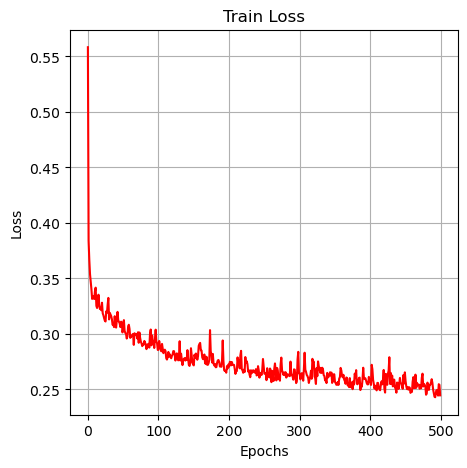

In [64]:
_, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(num_epochs), epoch_loss_mean, color='red')  # Plotting in red color
ax.set_title('Train Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True) 

Architecture description:
* 1st layer is a 10x64 fc layer with relu activation. The layer has a dropout of p=0.2 for each nueron.
* 2nd layer is a 64x64 fc layer with relu activation. The layer has a dropout of p=0.2 for each nueron.
* 3rd layer is a 64x128 fc layer with relu activation.
* the output layer is a 128x1 fc layer.

we have chosen the following hyper parameters:
* batch size = 128
* learning rate starts at 0.01
* num of epochs is 500
* weight initialization using kaiming normal
* bias initialization of 0s
* optimizer is ADAM , with default beta1=0.9, beta2=0.999 and epsilon = 1e-8 without weight decay
* loss criterion is as required BCEWithLogitsLoss




In [65]:
# evaulate the model - check BCE loss value
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test_prep, dtype=torch.float, device=device))
    test_bce_loss = criterion(test_outputs.view(-1), torch.tensor(y_test_np, dtype=torch.float, device=device))
print(f'test BCE loss value: {test_bce_loss.item()}')


# get the predicted values from the test set
test_features = torch.from_numpy(X_test_prep).float().to(device)
y_pred_logits = model(test_features).data.cpu().view(-1).numpy()

# Apply sigmoid function
y_pred_probs = torch.sigmoid(torch.tensor(y_pred_logits)).numpy()

# Check accuracy results
y_pred = (y_pred_probs > 0.5)
accuracy = np.sum(y_pred == y_test_np) / len(y_test)
print("Test accuracy: {:.3f} %".format(accuracy * 100))

test BCE loss value: 0.314546674489975
Test accuracy: 87.855 %


  0%|          | 1/500 [00:00<07:09,  1.16it/s]

epoch: 0 loss: 47490.23566696303


 10%|█         | 51/500 [00:38<05:57,  1.26it/s]

epoch: 50 loss: 0.6473292895725795


 20%|██        | 101/500 [01:15<05:21,  1.24it/s]

epoch: 100 loss: 0.644464407648359


 30%|███       | 151/500 [01:54<04:49,  1.21it/s]

epoch: 150 loss: 0.6473642309506734


 40%|████      | 201/500 [02:34<04:19,  1.15it/s]

epoch: 200 loss: 0.6444252655619667


 50%|█████     | 251/500 [03:15<03:33,  1.17it/s]

epoch: 250 loss: 0.6472651441891988


 60%|██████    | 301/500 [03:55<02:44,  1.21it/s]

epoch: 300 loss: 0.6472746372222901


 70%|███████   | 351/500 [04:35<02:01,  1.23it/s]

epoch: 350 loss: 0.6442773756526765


 80%|████████  | 401/500 [05:14<01:12,  1.37it/s]

epoch: 400 loss: 0.6503930858203343


 90%|█████████ | 451/500 [05:51<00:36,  1.33it/s]

epoch: 450 loss: 0.6472914905775161


100%|██████████| 500/500 [06:27<00:00,  1.29it/s]


test BCE loss value for init1: 0.6567492485046387
Test accuracy for init1: 63.617 %


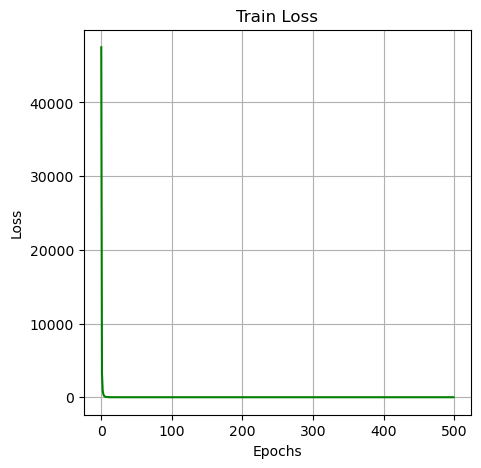

In [66]:
############################################# INIT 1 ###################################################
class GammaTelescopeMLP_init1(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GammaTelescopeMLP_init1, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64,128),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(128, output_dim)
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.ones_(m.weight)
                if m.bias is not None:
                    torch.nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.output_layer(self.hidden(x))

# define hyper-parmeters and create our model
num_features = 10
output_dim = 1
batch_size = 128
learning_rate = 0.01
num_epochs = 500
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.BCEWithLogitsLoss()
# model
model = GammaTelescopeMLP_init1(num_features, output_dim).to(device)
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

 
tensor_train_ds_1 = DataLoader(tensor_train_ds, batch_size=batch_size, shuffle=True)
epoch_loss_mean =  []

# training loop for the model
for epoch in tqdm(range(num_epochs)):
    model.train()  # change the mode to training, activating layers like DropOut and BatchNorm, if there are any
    epoch_losses = []
    for features, targets in tensor_train_ds_1:
        # send data to device
        features = features.to(device)
        targets = targets.to(device)
        # forward pass
        output = model(features)  # calls model.forward(features)
        # loss
        loss = criterion(output.view(-1), targets)
        # backward pass
        optimizer.zero_grad()  # clean the gradients from previous iteration, clears the `tensor.grad` field (tensor.grad=0)
        loss.backward()  # autograd backward to calculate gradients, assigns the `tensor.grad` field (e.g., tensor.grad=0.27)
        optimizer.step()  # apply update to the weights, applies the gradient update rule of the optimizer (param=param - lr * grad)
        epoch_losses.append(loss.item())
        
    epoch_loss_mean.append(np.mean(epoch_losses))
      
    if epoch % 50 == 0:
        print(f'epoch: {epoch} loss: {epoch_loss_mean[epoch]}')  
        
        
# plot the loss dependent on epoch
_, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(num_epochs), epoch_loss_mean, color='green')  # Plotting in red color
ax.set_title('Train Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True) 

        
# evaulate the model - check BCE loss value
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test_prep, dtype=torch.float, device=device))
    test_bce_loss = criterion(test_outputs.view(-1), torch.tensor(y_test_np, dtype=torch.float, device=device))
print(f'test BCE loss value for init1: {test_bce_loss.item()}')

# get the predicted values from the test set
test_features = torch.from_numpy(X_test_prep).float().to(device)
y_pred_logits = model(test_features).data.cpu().view(-1).numpy()

# Apply sigmoid function
y_pred_probs = torch.sigmoid(torch.tensor(y_pred_logits)).numpy()

# Check accuracy results
y_pred = (y_pred_probs > 0.5)
accuracy = np.sum(y_pred == y_test_np) / len(y_test)
print("Test accuracy for init1: {:.3f} %".format(accuracy * 100)) 
    

  0%|          | 1/500 [00:00<06:09,  1.35it/s]

epoch: 0 loss: 0.4082167775858016


 10%|█         | 51/500 [00:39<06:12,  1.20it/s]

epoch: 50 loss: 0.2953064698992031


 20%|██        | 101/500 [01:20<05:22,  1.24it/s]

epoch: 100 loss: 0.2941638588905334


 30%|███       | 151/500 [01:58<03:55,  1.48it/s]

epoch: 150 loss: 0.2820825028987158


 40%|████      | 201/500 [02:35<04:15,  1.17it/s]

epoch: 200 loss: 0.2633532613515854


 50%|█████     | 251/500 [03:14<03:08,  1.32it/s]

epoch: 250 loss: 0.26278484137285324


 60%|██████    | 301/500 [03:51<02:33,  1.30it/s]

epoch: 300 loss: 0.25682379404703776


 70%|███████   | 351/500 [04:28<01:59,  1.24it/s]

epoch: 350 loss: 0.26757704062121257


 80%|████████  | 401/500 [05:06<01:21,  1.22it/s]

epoch: 400 loss: 0.2604534018607367


 90%|█████████ | 451/500 [05:44<00:41,  1.18it/s]

epoch: 450 loss: 0.25430206993978466


100%|██████████| 500/500 [06:21<00:00,  1.31it/s]


test BCE loss value for init2: 0.33008939027786255
Test accuracy for init2: 87.434 %


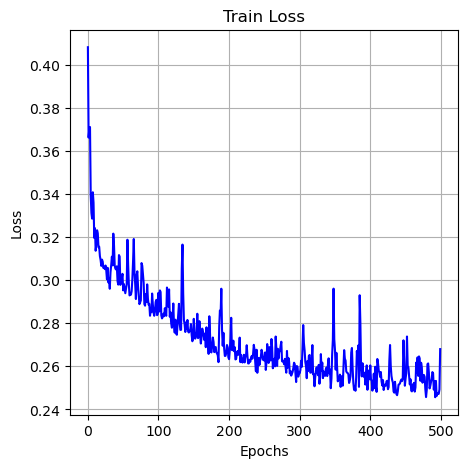

In [72]:
############################################# INIT 2 ###################################################
class GammaTelescopeMLP_init2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GammaTelescopeMLP_init2, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64,64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64,128),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(128, output_dim)
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_normal_(m.weight, gain=1.0)
                if m.bias is not None:
                    torch.nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.output_layer(self.hidden(x))

# define hyper-parmeters and create our model
num_features = 10
output_dim = 1
batch_size = 128
learning_rate = 0.01
num_epochs = 500
# device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# loss criterion
criterion = nn.BCEWithLogitsLoss()
# model
model = GammaTelescopeMLP_init2(num_features, output_dim).to(device)
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

 
tensor_train_ds_2 = DataLoader(tensor_train_ds, batch_size=batch_size, shuffle=True)
epoch_loss_mean =  []

# training loop for the model
for epoch in tqdm(range(num_epochs)):
    model.train()  # change the mode to training, activating layers like DropOut and BatchNorm, if there are any
    epoch_losses = []
    for features, targets in tensor_train_ds_2:
        # send data to device
        features = features.to(device)
        targets = targets.to(device)
        # forward pass
        output = model(features)  # calls model.forward(features)
        # loss
        loss = criterion(output.view(-1), targets)
        # backward pass
        optimizer.zero_grad()  # clean the gradients from previous iteration, clears the `tensor.grad` field (tensor.grad=0)
        loss.backward()  # autograd backward to calculate gradients, assigns the `tensor.grad` field (e.g., tensor.grad=0.27)
        optimizer.step()  # apply update to the weights, applies the gradient update rule of the optimizer (param=param - lr * grad)
        epoch_losses.append(loss.item())
        
    epoch_loss_mean.append(np.mean(epoch_losses))
      
    if epoch % 50 == 0:
        print(f'epoch: {epoch} loss: {epoch_loss_mean[epoch]}')  
        
# evaulate the model - check BCE loss value
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test_prep, dtype=torch.float, device=device))
    test_bce_loss = criterion(test_outputs.view(-1), torch.tensor(y_test_np, dtype=torch.float, device=device))
print(f'test BCE loss value for init2: {test_bce_loss.item()}')

# plot the loss dependent on epoch
_, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(num_epochs), epoch_loss_mean, color='blue')  # Plotting in red color
ax.set_title('Train Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True) 


# get the predicted values from the test set
test_features = torch.from_numpy(X_test_prep).float().to(device)
y_pred_logits = model(test_features).data.cpu().view(-1).numpy()

# Apply sigmoid function
y_pred_probs = torch.sigmoid(torch.tensor(y_pred_logits)).numpy()

# Check accuracy results
y_pred = (y_pred_probs > 0.5)
accuracy = np.sum(y_pred == y_test_np) / len(y_test)
print("Test accuracy for init2: {:.3f} %".format(accuracy * 100)) 

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify 10 classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute) - **The Imagenette Dataset**.

* 10 classes, 1 for each object.
* 9469 images for training and 3925 for testing (70/30 separation).
* We will use a downscaled version where the images are resized to $64\times 64$ resolution.

<center><img src="https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png" style="height:300px"></center>

1. Load the the Imagenette dataset with PyTorch using `torchvision.datasets.Imagenette(
    root='./datasets', split='train', size='160px', download=True, transform=transform_train)`, where `split` is either `'train'` or `'val'`, you can read more here: https://pytorch.org/vision/main/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette . Use the `transform` parameter to resize the images to $64 \times 64$ (for train, validation and test) and convert the data to tensors, e.g.,
   
   <code>transform_test=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),])</code>
    
   Display 5 images from the train set.

   <a href="https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb">Train, Validation and Test Split for torchvision Datasets</a>
3. Design a Convolutional Neural Network (CNN) to classify classes from the images.
    * You are **not allowed** to use `BatchNorm` in your architecture, but can use any other normalization (`GroupNorm`, `LayerNorm`, and etc..).
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in MegaBytes (MB)? (see the convolution tutorial). **Print** these numbers.
4. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * **DO NOT USE ANY IMAGE AUGMENTATIONS IN THIS PART** (You can still use `Normalize` if you wish, but no cropping, flipping and etc...).
    * You are not allowed to use pre-trained models (i.e., no transfer learning, only learning from scratch).
    * Describe the hyper-parameters of the model (batch size, epochs, optimizer, learning rate, scheduler....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 73% accuracy in this section, and 78% for maximum points in section 5.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.
6. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1).$$ **Print** the result for each value of $a$.
7. Retrain the classifier, but this time use data augementations of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

New training dataset size: 10764
New validation dataset size: 2630


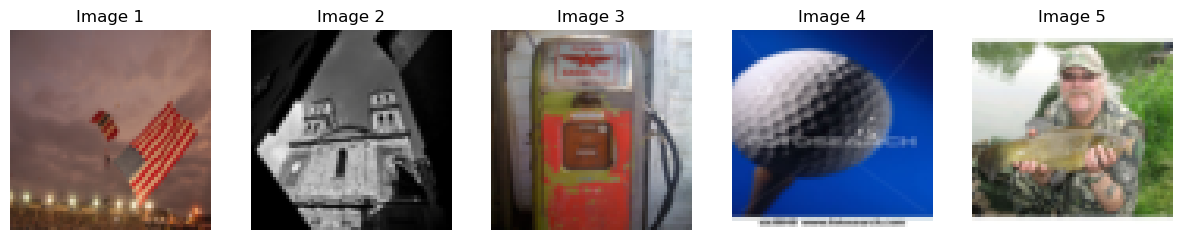

In [35]:
######################################### PART 1 ##########################################
import torchvision
import torchvision.transforms as transforms
import random
from torch.utils.data import Subset, ConcatDataset

# Define the transformation for the train and validation sets
transform_train = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),        
])

transform_val = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor(),        
])


# Check if the Imagenette dataset exists
dataset_root = './datasets'
if not os.path.exists(os.path.join(dataset_root, 'imagenette2')): download_flag = True
else: download_flag = False


# Load the training and validation datasets with the transformations
imagenette_train = torchvision.datasets.Imagenette(
    root='./datasets',
    split='train',
    download=download_flag,
    transform=transform_train
)

imagenette_val = torchvision.datasets.Imagenette(
    root='./datasets',
    split='val',
    download=download_flag,
    transform=transform_val
)


############################# train , val , test split -> 70% , 10% , 20% #############################
# Calculate 50% of the val set size for test and the other for validation
val_size = len(imagenette_val)
val_indices = list(range(val_size))
random.shuffle(val_indices)
num_to_transfer = int(0.33 * val_size)

# Split the validation indices into transfer and remaining
transfer_indices = val_indices[:num_to_transfer]
remaining_indices = val_indices[num_to_transfer:]

# Create subsets for the transfer and remaining validation data
transfer_subset = Subset(imagenette_val, transfer_indices)
remaining_subset = Subset(imagenette_val, remaining_indices)

# Combine the training dataset with the transfer subset
imagenette_train = ConcatDataset([imagenette_train, transfer_subset])

# Update the validation dataset to be the remaining subset
imagenette_val = remaining_subset

# Print sizes of new datasets
print(f"New training dataset size: {len(imagenette_train)}")
print(f"New validation dataset size: {len(imagenette_val)}")


# Get 5 unique random indices
random_indices = random.sample(range(len(imagenette_train)), 5)

# Plotting 5 random images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    image, label = imagenette_train[idx]
    image = image.permute(1, 2, 0) 
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')



In [36]:
######################################### PART 2 ##########################################
import torch.nn as nn

################################ Imagenette Class #############################
class ImagenetteCNN(nn.Module):
    """ CNN for the Imagenette dataset """
    def __init__(self, input_channels=3, output_channels=10):
        """ CNN Builder """
        super(ImagenetteCNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            # Conv Layer block 1
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),  # input_channels=3
            nn.GroupNorm(num_groups=4, num_channels=32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # output size = 32 x 32

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(num_groups=8, num_channels=128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # output size = 16 x 16
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.GroupNorm(num_groups=16, num_channels=256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # output size = 8 x 8
            nn.MaxPool2d(kernel_size=2, stride=2),  # output size = 4 x 4
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(256 * 4 * 4, 1024),  # 256 * 4 * 4 = 4096
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, output_channels)
        )



    def forward(self, x):
       
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x
    

############################ Utils #################################    
    
# Initialize the CNN classifier
input_channels = 3
output_channels = 10
model = ImagenetteCNN(input_channels, output_channels)

# print info regards the CNN model
# number of parameters
num_trainable_params = sum([p.numel() for p in model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)

# model size
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024 ** 2
print(f"model size: {size_all_mb:.2f} MB")


# hyper-parameters
batch_size = 256
learning_rate = 1e-4
epochs = 20

# loading the data and shuffling it
trainloader = torch.utils.data.DataLoader(imagenette_train, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(imagenette_val, batch_size=batch_size, shuffle=False, num_workers=4)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using the device: {device}")
model.to(device)

# loss criterion
criterion = nn.CrossEntropyLoss()

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



num trainable weights:  5852170
model size: 22.32 MB
Using the device: cuda:0


In [37]:
######################################### PART 3 ##########################################

# helper functions
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode,  turn off Dropout, BatchNorm uses learned statistics
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10, 10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1 

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix


# training loop
epoch_losses = []

for epoch in range(1, epochs + 1):
    model.train()  # traning mode - dropout activated
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)
        # augmentation with `kornia` happens here inputs = aug_list(inputs)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    epoch_loss = running_loss / len(trainloader)
    epoch_losses.append(epoch_loss)  # Append to list

    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)

    # log = "Epoch: {epoch} | Loss: {running_loss:.4f} | Training accuracy: {train_accuracy:.3f}% | Test accuracy: {test_accuracy:.3f}% | Epoch Time: {epoch_time:.2f} secs"
    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}%  | Test accuracy: {:.3f}% | ".format(epoch, epoch_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)

    print(log)
    
    # save model
    if epoch % 20 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/cifar_cnn_ckpt.pth')

print('==> Finished Training ...')




Epoch: 1 | Loss: 2.0222 | Training accuracy: 40.403%  | Test accuracy: 39.049% | Epoch Time: 263.26 secs
Epoch: 2 | Loss: 1.6033 | Training accuracy: 46.944%  | Test accuracy: 44.487% | Epoch Time: 260.22 secs
Epoch: 3 | Loss: 1.4114 | Training accuracy: 53.660%  | Test accuracy: 51.065% | Epoch Time: 255.98 secs
Epoch: 4 | Loss: 1.2882 | Training accuracy: 58.324%  | Test accuracy: 54.715% | Epoch Time: 262.45 secs
Epoch: 5 | Loss: 1.1559 | Training accuracy: 61.139%  | Test accuracy: 56.768% | Epoch Time: 261.16 secs
Epoch: 6 | Loss: 1.1039 | Training accuracy: 64.892%  | Test accuracy: 60.798% | Epoch Time: 263.78 secs
Epoch: 7 | Loss: 1.0014 | Training accuracy: 70.922%  | Test accuracy: 65.741% | Epoch Time: 263.25 secs
Epoch: 8 | Loss: 0.9171 | Training accuracy: 72.166%  | Test accuracy: 67.034% | Epoch Time: 3683.41 secs
Epoch: 9 | Loss: 0.8604 | Training accuracy: 72.863%  | Test accuracy: 66.312% | Epoch Time: 271.95 secs
Epoch: 10 | Loss: 0.8222 | Training accuracy: 76.068% 

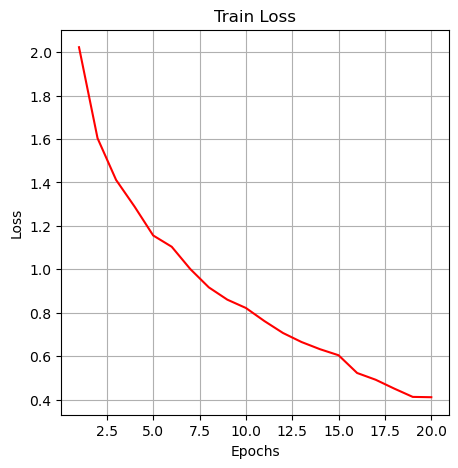

In [38]:
# plot the loss of each epoch
_, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(1, epochs + 1), epoch_losses, color='red')  # Plotting in red color
ax.set_title('Train Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True) 

In [39]:
# load model, calculate accuracy and confusion matrix
state = torch.load('./checkpoints/cifar_cnn_ckpt.pth', map_location=device)
model.load_state_dict(state['net'])
# note: `map_location` is necessary if you trained on the GPU and want to run inference on the CPU

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

# # plot confusion matrix
# fig, ax = plt.subplots(1,1,figsize=(8,6))
# ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
# plt.ylabel('Actual Category')
# plt.yticks(range(10), imagenette_train.classes)
# plt.xlabel('Predicted Category')
# plt.xticks(range(10), imagenette_train.classes)
# plt.show()

test accuracy: 74.563%


Architecture description:

** add here **
.
.
.
.
.
.
.

In [40]:
######################################### PART 4 ##########################################
a_noise = [0.05, 0.01, 0.005]
correct = 0
total = 0
for i in a_noise:
    with torch.no_grad():
        for images, labels in testloader:
            image_a = images + i*torch.randn(images.size())
            image_a = image_a.to(device)

            labels = labels.to(device)

            outputs = model(image_a)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy for a = {i}: {accuracy}%")
  

Test Accuracy for a = 0.05: 66.50190114068441%
Test Accuracy for a = 0.01: 70.39923954372624%
Test Accuracy for a = 0.005: 71.787072243346%


In [ ]:
######################################### PART 5 ##########################################

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/